In [3]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import 'matplotlib.pyplot' 
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to suppress the notation 'e'    
pd.options.display.float_format = '{:.6f}'.format

# import various metrics from 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split


In [4]:
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
df = pd.read_csv('D:\CAPSTONE PROJECT\Project_Dataset.csv')
df.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,grade_num,addr_state_NE,addr_state_S,addr_state_W
0,0,14350,14350,14350.000000,0,19.190000,9,28700.000000,1,33.880000,0.000000,1.000000,50.000000,14.000000,1.000000,22515.000000,73.100000,28.000000,0,1173.840000,0.000000,0.000000,0.000000,0.000000,26,0.000000,0.000000,28699.000000,30800.000000,0,53,0,1,0
1,1,4800,4800,4800.000000,0,10.990000,0,65000.000000,1,3.640000,0.000000,1.000000,0.000000,6.000000,0.000000,7624.000000,23.200000,13.000000,1,83.950000,0.000000,0.000000,0.000000,0.000000,9,0.000000,0.000000,9974.000000,32900.000000,0,22,0,1,0
2,2,10000,10000,10000.000000,0,7.260000,2,45000.000000,0,18.420000,0.000000,0.000000,0.000000,5.000000,0.000000,10877.000000,31.200000,19.000000,1,56.470000,0.000000,0.000000,0.000000,0.000000,9,0.000000,65.000000,38295.000000,34900.000000,0,12,0,0,0
3,3,15000,15000,15000.000000,0,19.720000,10,105000.000000,0,14.970000,0.000000,2.000000,46.000000,10.000000,0.000000,13712.000000,55.500000,21.000000,0,4858.620000,0.000000,0.000000,0.000000,0.000000,135,0.000000,0.000000,55564.000000,24700.000000,0,41,0,1,0
4,4,16000,16000,16000.000000,0,10.640000,10,52000.000000,1,20.160000,0.000000,0.000000,0.000000,11.000000,0.000000,35835.000000,76.200000,27.000000,1,2296.410000,0.000000,0.000000,0.000000,0.000000,96,0.000000,0.000000,47159.000000,47033.000000,0,24,0,0,1


In [6]:
dfc = df.copy()

In [7]:
dfc_0 = dfc[dfc['loan_status']==0]
dfc_1 = dfc[dfc['loan_status']==1]

In [8]:
dfc_0.shape

(406598, 34)

In [9]:
dfc_1.shape

(125814, 34)

In [126]:
df.shape

(532412, 34)

In [10]:
#Value added cols

dfc['loan_to_income'] = dfc['annual_inc']/dfc['funded_amnt']
dfc['bad_state'] = dfc['acc_now_delinq'] + (dfc['total_rec_late_fee']/dfc['funded_amnt']) + (dfc['recoveries']/dfc['funded_amnt'])+(dfc['collection_recovery_fee']/dfc['funded_amnt']) + (dfc['collections_12_mths_ex_med']/dfc['funded_amnt'])
dfc.loc[dfc['bad_state'] > 0, 'bad_state'] = 1
dfc['avl_lines'] = dfc['total_acc'] - dfc['open_acc']
dfc['int_paid'] = dfc['total_rec_int'] + dfc['total_rec_late_fee']
dfc['emi_paid_progress_perc'] = ((dfc['last_week_pay']/(dfc['term']/12*52+1))*100)


In [11]:
dfc.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc
0,0,14350,14350,14350.000000,0,19.190000,9,28700.000000,1,33.880000,0.000000,1.000000,50.000000,14.000000,1.000000,22515.000000,73.100000,28.000000,0,1173.840000,0.000000,0.000000,0.000000,0.000000,26,0.000000,0.000000,28699.000000,30800.000000,0,53,0,1,0,2.000000,0.000000,14.000000,1173.840000,2600.000000
1,1,4800,4800,4800.000000,0,10.990000,0,65000.000000,1,3.640000,0.000000,1.000000,0.000000,6.000000,0.000000,7624.000000,23.200000,13.000000,1,83.950000,0.000000,0.000000,0.000000,0.000000,9,0.000000,0.000000,9974.000000,32900.000000,0,22,0,1,0,13.541667,0.000000,7.000000,83.950000,900.000000
2,2,10000,10000,10000.000000,0,7.260000,2,45000.000000,0,18.420000,0.000000,0.000000,0.000000,5.000000,0.000000,10877.000000,31.200000,19.000000,1,56.470000,0.000000,0.000000,0.000000,0.000000,9,0.000000,65.000000,38295.000000,34900.000000,0,12,0,0,0,4.500000,0.000000,14.000000,56.470000,900.000000
3,3,15000,15000,15000.000000,0,19.720000,10,105000.000000,0,14.970000,0.000000,2.000000,46.000000,10.000000,0.000000,13712.000000,55.500000,21.000000,0,4858.620000,0.000000,0.000000,0.000000,0.000000,135,0.000000,0.000000,55564.000000,24700.000000,0,41,0,1,0,7.000000,0.000000,11.000000,4858.620000,13500.000000
4,4,16000,16000,16000.000000,0,10.640000,10,52000.000000,1,20.160000,0.000000,0.000000,0.000000,11.000000,0.000000,35835.000000,76.200000,27.000000,1,2296.410000,0.000000,0.000000,0.000000,0.000000,96,0.000000,0.000000,47159.000000,47033.000000,0,24,0,0,1,3.250000,0.000000,16.000000,2296.410000,9600.000000


In [12]:
y = dfc.loan_status

In [13]:
X = dfc.drop(['loan_status','Unnamed: 0'],axis =1)
X.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'emp_length', 'annual_inc', 'verification_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'grade_num', 'addr_state_NE', 'addr_state_S',
       'addr_state_W', 'loan_to_income', 'bad_state', 'avl_lines', 'int_paid',
       'emi_paid_progress_perc'],
      dtype='object')

In [14]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                       feature         VIF
0                    loan_amnt 2876.242823
1                  funded_amnt 4207.338523
2              funded_amnt_inv 1074.036513
3                         term    4.741906
4                     int_rate   77.522688
5                   emp_length    3.273873
6                   annual_inc    4.879300
7          verification_status    3.811913
8                          dti    7.285146
9                  delinq_2yrs    1.215301
10              inq_last_6mths    1.714396
11      mths_since_last_delinq    1.608697
12                    open_acc         inf
13                     pub_rec    1.163368
14                   revol_bal    5.673698
15                  revol_util    8.993797
16                   total_acc         inf
17         initial_list_status    2.162013
18               total_rec_int         inf
19          total_rec_late_fee         inf
20                  recoveries    3.647580
21     collection_recovery_fee    2.867205
22  collect

In [15]:
from imblearn.over_sampling import RandomOverSampler

In [16]:
ros = RandomOverSampler(random_state=0,sampling_strategy=0.8)

In [17]:
X_train,X_test , y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2)

In [18]:
upsample_train_X,upsample_train_y = ros.fit_resample(X_train,y_train)
upsample_train_y.value_counts()


0    325272
1    260217
Name: loan_status, dtype: int64

In [19]:
X_over, y_over = ros.fit_resample(X , y)

# ADABOOST

In [20]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_res_train, y_res_test = train_test_split(upsample_train_X, upsample_train_y)
ada = AdaBoostClassifier(n_estimators = 40)
ada.fit(X_train, y_res_train)

y_pred = ada.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_res_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76     81255
           1       0.72      0.60      0.65     65118

    accuracy                           0.72    146373
   macro avg       0.72      0.71      0.71    146373
weighted avg       0.72      0.72      0.72    146373



In [21]:
X1= X.drop(['open_acc'],axis =1)
X1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'emp_length', 'annual_inc', 'verification_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'last_week_pay', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'grade_num',
       'addr_state_NE', 'addr_state_S', 'addr_state_W', 'loan_to_income',
       'bad_state', 'avl_lines', 'int_paid', 'emi_paid_progress_perc'],
      dtype='object')

In [22]:
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]
  
print(vif_data)

                       feature         VIF
0                    loan_amnt 2876.242823
1                  funded_amnt 4207.338523
2              funded_amnt_inv 1074.036513
3                         term    4.741906
4                     int_rate   77.522688
5                   emp_length    3.273873
6                   annual_inc    4.879300
7          verification_status    3.811913
8                          dti    7.285146
9                  delinq_2yrs    1.215301
10              inq_last_6mths    1.714396
11      mths_since_last_delinq    1.608697
12                     pub_rec    1.163368
13                   revol_bal    5.673698
14                  revol_util    8.993797
15                   total_acc   37.737466
16         initial_list_status    2.162013
17               total_rec_int         inf
18          total_rec_late_fee         inf
19                  recoveries    3.647580
20     collection_recovery_fee    2.867205
21  collections_12_mths_ex_med    1.513470
22         

In [23]:
#SPLITTING TRAIN AND TEST DATA

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train_1,X_test_1 , y_train_1,y_test_1 = train_test_split(X1,y,random_state=10,test_size=0.2)

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
#BALANCING THE TRAINED DATA SET BY ONLY 80%

In [28]:
from imblearn.over_sampling import RandomOverSampler

In [29]:
#Upsampling trained data by 80%
ros = RandomOverSampler(random_state=0,sampling_strategy=0.8)

In [30]:
upsample_train_X_1,upsample_train_y_1 = ros.fit_resample(X_train_1,y_train_1)
upsample_train_y_1.value_counts()


0    325272
1    260217
Name: loan_status, dtype: int64

In [31]:
X_over_1, y_over_1 = ros.fit_resample(X1 , y)

# ADABOOST

In [32]:
from sklearn.ensemble import AdaBoostClassifier

X_train_11, X_test_11, y_res_train_11, y_res_test_11 = train_test_split(upsample_train_X_1, upsample_train_y_1)
ada = AdaBoostClassifier(n_estimators = 40)
ada.fit(X_train_11, y_res_train_11)

y_pred_11 = ada.predict(X_test_11)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_11,y_pred_11))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76     81332
           1       0.72      0.60      0.65     65041

    accuracy                           0.72    146373
   macro avg       0.72      0.71      0.71    146373
weighted avg       0.72      0.72      0.71    146373



# LOGISTIC REGRESSION

In [33]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(X_train_11,y_res_train_11)

y_pred_11 = logreg1.predict(X_test_11)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_11,y_pred_11))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69     81332
           1       0.61      0.55      0.58     65041

    accuracy                           0.65    146373
   macro avg       0.64      0.64      0.64    146373
weighted avg       0.64      0.65      0.64    146373



# DECISION TREE

In [34]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier(criterion = 'gini',random_state = 42,max_depth=3,min_samples_leaf=5)
DT_Model.fit(X_train_11, y_res_train_11)

y_pred_11 = DT_Model.predict(X_test_11)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_11,y_pred_11))

              precision    recall  f1-score   support

           0       0.72      0.58      0.64     81332
           1       0.58      0.72      0.64     65041

    accuracy                           0.64    146373
   macro avg       0.65      0.65      0.64    146373
weighted avg       0.66      0.64      0.64    146373



# RANDOM FOREST

In [35]:
from sklearn.ensemble import RandomForestClassifier
RD = RandomForestClassifier(criterion = 'gini',random_state = 42,max_depth=3,min_samples_leaf=5)
RD.fit(X_train_11, y_res_train_11)

y_pred_11 = RD.predict(X_test_11)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_11,y_pred_11))

              precision    recall  f1-score   support

           0       0.65      0.93      0.77     81332
           1       0.82      0.37      0.51     65041

    accuracy                           0.68    146373
   macro avg       0.73      0.65      0.64    146373
weighted avg       0.72      0.68      0.65    146373



# XG BOOST

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score , roc_curve

xgb=XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=1, 
    gamma=10, 
    n_estimators=200)
xgb.fit(X_train_11,y_res_train_11)
y_pred_11 = xgb.predict(X_test_11)
print(roc_auc_score(y_res_test_11,y_pred_11))
print(classification_report(y_res_test_11,y_pred_11))



0.6756354336783386
              precision    recall  f1-score   support

           0       0.68      0.83      0.75     81332
           1       0.71      0.52      0.60     65041

    accuracy                           0.69    146373
   macro avg       0.70      0.68      0.68    146373
weighted avg       0.70      0.69      0.68    146373



In [37]:
X2= X.drop(['open_acc','total_rec_int'],axis =1)
X2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'emp_length', 'annual_inc', 'verification_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'grade_num', 'addr_state_NE', 'addr_state_S',
       'addr_state_W', 'loan_to_income', 'bad_state', 'avl_lines', 'int_paid',
       'emi_paid_progress_perc'],
      dtype='object')

In [38]:
vif_data = pd.DataFrame()
vif_data["feature"] = X2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
  
print(vif_data)

                       feature         VIF
0                    loan_amnt 2876.242823
1                  funded_amnt 4207.338523
2              funded_amnt_inv 1074.036513
3                         term    4.741906
4                     int_rate   77.522688
5                   emp_length    3.273873
6                   annual_inc    4.879300
7          verification_status    3.811913
8                          dti    7.285146
9                  delinq_2yrs    1.215301
10              inq_last_6mths    1.714396
11      mths_since_last_delinq    1.608697
12                     pub_rec    1.163368
13                   revol_bal    5.673698
14                  revol_util    8.993797
15                   total_acc   37.737466
16         initial_list_status    2.162013
17          total_rec_late_fee    1.374509
18                  recoveries    3.647580
19     collection_recovery_fee    2.867205
20  collections_12_mths_ex_med    1.513470
21               last_week_pay   25.656878
22         

In [39]:
#SPLITTING TRAIN AND TEST DATA

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train_2,X_test_2 , y_train_2,y_test_2 = train_test_split(X2,y,random_state=10,test_size=0.2)

In [42]:
#BALANCNG THE TRAIN DATA BY 80%

In [43]:
from imblearn.over_sampling import RandomOverSampler

In [44]:
#Upsampling trained data by 80%
ros = RandomOverSampler(random_state=0,sampling_strategy=0.8)

In [45]:
upsample_train_X_2,upsample_train_y_2 = ros.fit_resample(X_train_2,y_train_2)
upsample_train_y_2.value_counts()

0    325272
1    260217
Name: loan_status, dtype: int64

In [46]:
X_over_2, y_over_2 = ros.fit_resample(X2 , y)

# ADABOOST

In [47]:
from sklearn.ensemble import AdaBoostClassifier

X_train_22, X_test_22, y_res_train_22, y_res_test_22 = train_test_split(upsample_train_X_2, upsample_train_y_2)
ada = AdaBoostClassifier(n_estimators = 40)
ada.fit(X_train_22, y_res_train_22)

y_pred_22 = ada.predict(X_test_22)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_22,y_pred_22))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76     81337
           1       0.73      0.59      0.65     65036

    accuracy                           0.72    146373
   macro avg       0.72      0.71      0.71    146373
weighted avg       0.72      0.72      0.71    146373



# LOGISTIC REGRESSION

In [48]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(X_train_22,y_res_train_22)

y_pred_22 = logreg1.predict(X_test_22)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_22,y_pred_22))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70     81337
           1       0.62      0.54      0.58     65036

    accuracy                           0.65    146373
   macro avg       0.64      0.64      0.64    146373
weighted avg       0.64      0.65      0.64    146373



# DECISION TREE

In [49]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier(criterion = 'gini',random_state = 42,max_depth=3,min_samples_leaf=5)
DT_Model.fit(X_train_22, y_res_train_22)

y_pred_22 = DT_Model.predict(X_test_22)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_22,y_pred_22))

              precision    recall  f1-score   support

           0       0.72      0.58      0.64     81337
           1       0.58      0.73      0.64     65036

    accuracy                           0.64    146373
   macro avg       0.65      0.65      0.64    146373
weighted avg       0.66      0.64      0.64    146373



# RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestClassifier
RD = RandomForestClassifier(criterion = 'gini',random_state = 42,max_depth=3,min_samples_leaf=5)
RD.fit(X_train_22, y_res_train_22)

y_pred_22 = RD.predict(X_test_22)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_22,y_pred_22))

              precision    recall  f1-score   support

           0       0.64      0.94      0.77     81337
           1       0.83      0.34      0.49     65036

    accuracy                           0.68    146373
   macro avg       0.74      0.64      0.63    146373
weighted avg       0.73      0.68      0.64    146373



# XG BOOST

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score , roc_curve

xgb=XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=1, 
    gamma=10, 
    n_estimators=200)
xgb.fit(X_train_22,y_res_train_22)
y_pred_22 = xgb.predict(X_test_22)
print(roc_auc_score(y_res_test_22,y_pred_22))
print(classification_report(y_res_test_22,y_pred_22))


0.6773391805736076
              precision    recall  f1-score   support

           0       0.69      0.83      0.75     81337
           1       0.71      0.52      0.60     65036

    accuracy                           0.69    146373
   macro avg       0.70      0.68      0.68    146373
weighted avg       0.70      0.69      0.69    146373



In [52]:
X3= X.drop(['open_acc','total_rec_int','funded_amnt'],axis =1)
X3.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'emp_length',
       'annual_inc', 'verification_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'grade_num', 'addr_state_NE', 'addr_state_S',
       'addr_state_W', 'loan_to_income', 'bad_state', 'avl_lines', 'int_paid',
       'emi_paid_progress_perc'],
      dtype='object')

In [53]:
vif_data = pd.DataFrame()
vif_data["feature"] = X3.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X3.values, i)
                          for i in range(len(X3.columns))]
  
print(vif_data)

                       feature        VIF
0                    loan_amnt 733.360107
1              funded_amnt_inv 734.623744
2                         term   4.733492
3                     int_rate  77.478001
4                   emp_length   3.273866
5                   annual_inc   4.878655
6          verification_status   3.811448
7                          dti   7.285105
8                  delinq_2yrs   1.215299
9               inq_last_6mths   1.713556
10      mths_since_last_delinq   1.608656
11                     pub_rec   1.163368
12                   revol_bal   5.673661
13                  revol_util   8.991930
14                   total_acc  37.734803
15         initial_list_status   2.161973
16          total_rec_late_fee   1.374243
17                  recoveries   3.646612
18     collection_recovery_fee   2.865659
19  collections_12_mths_ex_med   1.513467
20               last_week_pay  25.422632
21              acc_now_delinq   1.172181
22                tot_coll_amt   1

In [54]:
# SPLITTING TRAIN AND TEST

In [55]:
X_train_3,X_test_3 , y_train_3,y_test_3 = train_test_split(X3,y,random_state=10,test_size=0.2)

In [56]:
#BALANCING THE TRAIN DATA BY 80%

In [57]:
upsample_train_X_3,upsample_train_y_3 = ros.fit_resample(X_train_3,y_train_3)
upsample_train_y_3.value_counts()

0    325272
1    260217
Name: loan_status, dtype: int64

In [58]:
X_over_3, y_over_3 = ros.fit_resample(X3 , y)

# ADABOOST

In [59]:
from sklearn.ensemble import AdaBoostClassifier

X_train_33, X_test_33, y_res_train_33, y_res_test_33 = train_test_split(upsample_train_X_3, upsample_train_y_3)
ada = AdaBoostClassifier(n_estimators = 40)
ada.fit(X_train_33, y_res_train_33)

y_pred_33 = ada.predict(X_test_33)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_33,y_pred_33))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77     81839
           1       0.72      0.60      0.65     64534

    accuracy                           0.72    146373
   macro avg       0.72      0.71      0.71    146373
weighted avg       0.72      0.72      0.72    146373



# LOGISTIC REGRESSION

In [60]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(X_train_33,y_res_train_33)

y_pred_33 = logreg1.predict(X_test_33)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_33,y_pred_33))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70     81839
           1       0.61      0.55      0.58     64534

    accuracy                           0.65    146373
   macro avg       0.64      0.64      0.64    146373
weighted avg       0.65      0.65      0.65    146373



# DECISION TREE

In [61]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier(criterion = 'gini',random_state = 42,max_depth=3,min_samples_leaf=5)
DT_Model.fit(X_train_33, y_res_train_33)

y_pred_33 = DT_Model.predict(X_test_33)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_33,y_pred_33))

              precision    recall  f1-score   support

           0       0.73      0.58      0.65     81839
           1       0.58      0.73      0.64     64534

    accuracy                           0.65    146373
   macro avg       0.65      0.65      0.65    146373
weighted avg       0.66      0.65      0.65    146373



# RANDOM FOREST

In [62]:
from sklearn.ensemble import RandomForestClassifier
RD = RandomForestClassifier(criterion = 'gini',random_state = 42,max_depth=3,min_samples_leaf=5)
RD.fit(X_train_33, y_res_train_33)

y_pred_33 = RD.predict(X_test_33)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_33,y_pred_33))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77     81839
           1       0.86      0.36      0.51     64534

    accuracy                           0.69    146373
   macro avg       0.75      0.66      0.64    146373
weighted avg       0.74      0.69      0.66    146373



# XGBOOST

In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score , roc_curve

xgb=XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=1, 
    gamma=10, 
    n_estimators=200)
xgb.fit(X_train_33,y_res_train_33)
y_pred_33 = xgb.predict(X_test_33)
print(roc_auc_score(y_res_test_33,y_pred_33))
print(classification_report(y_res_test_33,y_pred_33))


0.6775977304460787
              precision    recall  f1-score   support

           0       0.69      0.83      0.75     81839
           1       0.71      0.52      0.60     64534

    accuracy                           0.70    146373
   macro avg       0.70      0.68      0.68    146373
weighted avg       0.70      0.70      0.69    146373



In [64]:
X4= X.drop(['open_acc','total_rec_int','funded_amnt','funded_amnt_inv'],axis =1)
X4.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc',
       'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'grade_num', 'addr_state_NE', 'addr_state_S',
       'addr_state_W', 'loan_to_income', 'bad_state', 'avl_lines', 'int_paid',
       'emi_paid_progress_perc'],
      dtype='object')

In [65]:
vif_data = pd.DataFrame()
vif_data["feature"] = X4.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X4.values, i)
                          for i in range(len(X4.columns))]
  
print(vif_data)

                       feature       VIF
0                    loan_amnt 11.383494
1                         term  4.730070
2                     int_rate 76.865080
3                   emp_length  3.273493
4                   annual_inc  4.878550
5          verification_status  3.807999
6                          dti  7.282758
7                  delinq_2yrs  1.215282
8               inq_last_6mths  1.707876
9       mths_since_last_delinq  1.608613
10                     pub_rec  1.163302
11                   revol_bal  5.643592
12                  revol_util  8.982210
13                   total_acc 37.734727
14         initial_list_status  2.159002
15          total_rec_late_fee  1.373987
16                  recoveries  3.645412
17     collection_recovery_fee  2.863811
18  collections_12_mths_ex_med  1.512789
19               last_week_pay 25.221487
20              acc_now_delinq  1.172020
21                tot_coll_amt  1.022800
22                 tot_cur_bal  2.734522
23            to

In [66]:
#SPLITTING TRAIN AND TEST DATA

In [67]:
X_train_4,X_test_4 , y_train_4,y_test_4 = train_test_split(X4,y,random_state=10,test_size=0.2)

In [68]:
#BALANCING THE TRAIN DATA BY 80%

In [69]:
upsample_train_X_4,upsample_train_y_4 = ros.fit_resample(X_train_4,y_train_4)
upsample_train_y_4.value_counts()

0    325272
1    260217
Name: loan_status, dtype: int64

In [70]:
X_over_4, y_over_4 = ros.fit_resample(X4 , y)

# ADABOOST

In [71]:
from sklearn.ensemble import AdaBoostClassifier

X_train_44, X_test_44, y_res_train_44, y_res_test_44 = train_test_split(upsample_train_X_4, upsample_train_y_4)
ada = AdaBoostClassifier(n_estimators = 40)
ada.fit(X_train_44, y_res_train_44)

y_pred_44 = ada.predict(X_test_44)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_44,y_pred_44))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77     81390
           1       0.73      0.59      0.65     64983

    accuracy                           0.72    146373
   macro avg       0.72      0.71      0.71    146373
weighted avg       0.72      0.72      0.71    146373



# LOGISTIC REGRESSION

In [72]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(X_train_44,y_res_train_44)

y_pred_44 = logreg1.predict(X_test_44)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_44,y_pred_44))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69     81390
           1       0.61      0.53      0.57     64983

    accuracy                           0.64    146373
   macro avg       0.64      0.63      0.63    146373
weighted avg       0.64      0.64      0.64    146373



# DECISION TREE

In [73]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier(criterion = 'gini',random_state = 42,max_depth=3,min_samples_leaf=5)
DT_Model.fit(X_train_44, y_res_train_44)

y_pred_44 = DT_Model.predict(X_test_44)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_44,y_pred_44))

              precision    recall  f1-score   support

           0       0.72      0.58      0.64     81390
           1       0.58      0.73      0.64     64983

    accuracy                           0.64    146373
   macro avg       0.65      0.65      0.64    146373
weighted avg       0.66      0.64      0.64    146373



# RANDOM FOREST

In [74]:
from sklearn.ensemble import RandomForestClassifier
RD = RandomForestClassifier(criterion = 'gini',random_state = 42,max_depth=3,min_samples_leaf=5)
RD.fit(X_train_44, y_res_train_44)

y_pred_44 = RD.predict(X_test_44)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_44,y_pred_44))

              precision    recall  f1-score   support

           0       0.65      0.93      0.76     81390
           1       0.80      0.37      0.51     64983

    accuracy                           0.68    146373
   macro avg       0.73      0.65      0.63    146373
weighted avg       0.72      0.68      0.65    146373



# XGBOOST

In [75]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score , roc_curve

xgb=XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=1, 
    gamma=10, 
    n_estimators=200)
xgb.fit(X_train_44,y_res_train_44)
y_pred_44 = xgb.predict(X_test_44)
print(roc_auc_score(y_res_test_44,y_pred_44))
print(classification_report(y_res_test_44,y_pred_44))


0.6753514828077836
              precision    recall  f1-score   support

           0       0.68      0.83      0.75     81390
           1       0.71      0.52      0.60     64983

    accuracy                           0.69    146373
   macro avg       0.70      0.68      0.68    146373
weighted avg       0.70      0.69      0.68    146373



In [76]:
X5= X.drop(['open_acc','total_rec_int','funded_amnt','funded_amnt_inv','int_rate'],axis =1)
X5.columns

Index(['loan_amnt', 'term', 'emp_length', 'annual_inc', 'verification_status',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'grade_num', 'addr_state_NE', 'addr_state_S',
       'addr_state_W', 'loan_to_income', 'bad_state', 'avl_lines', 'int_paid',
       'emi_paid_progress_perc'],
      dtype='object')

In [77]:
vif_data = pd.DataFrame()
vif_data["feature"] = X5.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X5.values, i)
                          for i in range(len(X5.columns))]
  
print(vif_data)

                       feature       VIF
0                    loan_amnt 11.383413
1                         term  4.662188
2                   emp_length  3.256132
3                   annual_inc  4.875334
4          verification_status  3.743489
5                          dti  7.195326
6                  delinq_2yrs  1.213602
7               inq_last_6mths  1.684921
8       mths_since_last_delinq  1.604329
9                      pub_rec  1.159219
10                   revol_bal  5.602925
11                  revol_util  8.501787
12                   total_acc 37.467263
13         initial_list_status  2.154865
14          total_rec_late_fee  1.371824
15                  recoveries  3.642090
16     collection_recovery_fee  2.862320
17  collections_12_mths_ex_med  1.511929
18               last_week_pay 25.217217
19              acc_now_delinq  1.171966
20                tot_coll_amt  1.022712
21                 tot_cur_bal  2.731954
22            total_rev_hi_lim  6.034890
23              

In [78]:
#SPLITTING TRAIN AND TEST DATA

In [79]:
X_train_5,X_test_5 , y_train_5,y_test_5 = train_test_split(X5,y,random_state=10,test_size=0.2)

In [80]:
#BALANCING THE TRAIN DATA BY 80%

In [81]:
upsample_train_X_5,upsample_train_y_5 = ros.fit_resample(X_train_5,y_train_5)
upsample_train_y_5.value_counts()

0    325272
1    260217
Name: loan_status, dtype: int64

In [82]:
X_over_5, y_over_5 = ros.fit_resample(X5 , y)

# ADABOOST

In [83]:
from sklearn.ensemble import AdaBoostClassifier

X_train_55, X_test_55, y_res_train_55, y_res_test_55 = train_test_split(upsample_train_X_5, upsample_train_y_5)
ada = AdaBoostClassifier(n_estimators = 40)
ada.fit(X_train_55, y_res_train_55)

y_pred_55 = ada.predict(X_test_55)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_55,y_pred_55))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76     81405
           1       0.72      0.56      0.63     64968

    accuracy                           0.71    146373
   macro avg       0.71      0.69      0.70    146373
weighted avg       0.71      0.71      0.70    146373



# LOGISTIC REGRESSION

In [84]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(X_train_55,y_res_train_55)

y_pred_55 = logreg1.predict(X_test_55)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_55,y_pred_55))

              precision    recall  f1-score   support

           0       0.66      0.73      0.70     81405
           1       0.62      0.53      0.57     64968

    accuracy                           0.65    146373
   macro avg       0.64      0.63      0.63    146373
weighted avg       0.64      0.65      0.64    146373



# DECISION TREE

In [85]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier(criterion = 'gini',random_state = 42,max_depth=3,min_samples_leaf=5)
DT_Model.fit(X_train_55, y_res_train_55)

y_pred_55 = DT_Model.predict(X_test_55)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_55,y_pred_55))

              precision    recall  f1-score   support

           0       0.73      0.58      0.64     81405
           1       0.58      0.73      0.64     64968

    accuracy                           0.64    146373
   macro avg       0.65      0.65      0.64    146373
weighted avg       0.66      0.64      0.64    146373



# RANDOM FOREST

In [86]:
from sklearn.ensemble import RandomForestClassifier
RD = RandomForestClassifier(criterion = 'gini',random_state = 42,max_depth=3,min_samples_leaf=5)
RD.fit(X_train_55, y_res_train_55)

y_pred_55 = RD.predict(X_test_55)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_55,y_pred_55))

              precision    recall  f1-score   support

           0       0.64      0.96      0.77     81405
           1       0.87      0.32      0.47     64968

    accuracy                           0.68    146373
   macro avg       0.76      0.64      0.62    146373
weighted avg       0.74      0.68      0.64    146373



# XG BOOST

In [87]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score , roc_curve

xgb=XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=1, 
    gamma=10, 
    n_estimators=200)
xgb.fit(X_train_55,y_res_train_55)
y_pred_55 = xgb.predict(X_test_55)
print(roc_auc_score(y_res_test_55,y_pred_55))
print(classification_report(y_res_test_55,y_pred_55))


0.6766360982306788
              precision    recall  f1-score   support

           0       0.69      0.83      0.75     81405
           1       0.71      0.52      0.60     64968

    accuracy                           0.69    146373
   macro avg       0.70      0.68      0.68    146373
weighted avg       0.70      0.69      0.69    146373



In [88]:
X6= X.drop(['open_acc','total_rec_int','funded_amnt','funded_amnt_inv','int_rate','total_acc'],axis =1)
X6.columns

Index(['loan_amnt', 'term', 'emp_length', 'annual_inc', 'verification_status',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'pub_rec', 'revol_bal', 'revol_util', 'initial_list_status',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'last_week_pay', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'grade_num',
       'addr_state_NE', 'addr_state_S', 'addr_state_W', 'loan_to_income',
       'bad_state', 'avl_lines', 'int_paid', 'emi_paid_progress_perc'],
      dtype='object')

In [89]:
vif_data = pd.DataFrame()
vif_data["feature"] = X6.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X6.values, i)
                          for i in range(len(X6.columns))]
  
print(vif_data)

                       feature       VIF
0                    loan_amnt 11.184208
1                         term  4.658902
2                   emp_length  3.252889
3                   annual_inc  4.868538
4          verification_status  3.743484
5                          dti  6.223439
6                  delinq_2yrs  1.212756
7               inq_last_6mths  1.669825
8       mths_since_last_delinq  1.603505
9                      pub_rec  1.159071
10                   revol_bal  5.547795
11                  revol_util  8.432709
12         initial_list_status  2.145226
13          total_rec_late_fee  1.371673
14                  recoveries  3.642040
15     collection_recovery_fee  2.862319
16  collections_12_mths_ex_med  1.511827
17               last_week_pay 25.178625
18              acc_now_delinq  1.171955
19                tot_coll_amt  1.022692
20                 tot_cur_bal  2.705826
21            total_rev_hi_lim  5.800924
22                   grade_num  9.763314
23              

In [90]:
#SPLITIING TRAIN AND TEST DATA

In [91]:
X_train_6,X_test_6 , y_train_6,y_test_6 = train_test_split(X6,y,random_state=10,test_size=0.2)

In [92]:
#SPLITTING TRAIN DATA BY 80%

In [93]:
upsample_train_X_6,upsample_train_y_6 = ros.fit_resample(X_train_6,y_train_6)
upsample_train_y_6.value_counts()

0    325272
1    260217
Name: loan_status, dtype: int64

In [94]:
X_over_6, y_over_6 = ros.fit_resample(X6 , y)

# ADABOOST

In [95]:
from sklearn.ensemble import AdaBoostClassifier

X_train_66, X_test_66, y_res_train_66, y_res_test_66 = train_test_split(upsample_train_X_6, upsample_train_y_6)
ada = AdaBoostClassifier(n_estimators = 40)
ada.fit(X_train_66, y_res_train_66)

y_pred_66 = ada.predict(X_test_66)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_66,y_pred_66))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76     81121
           1       0.72      0.57      0.64     65252

    accuracy                           0.71    146373
   macro avg       0.71      0.70      0.70    146373
weighted avg       0.71      0.71      0.70    146373



# LOGISTIC REGRESSION

In [96]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(X_train_66,y_res_train_66)

y_pred_66 = logreg1.predict(X_test_66)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_66,y_pred_66))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71     81121
           1       0.65      0.49      0.56     65252

    accuracy                           0.65    146373
   macro avg       0.65      0.64      0.64    146373
weighted avg       0.65      0.65      0.65    146373



# DECISION TREE

In [97]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier(criterion = 'gini',random_state = 42,max_depth=3,min_samples_leaf=5)
DT_Model.fit(X_train_66, y_res_train_66)

y_pred_66 = DT_Model.predict(X_test_66)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_66,y_pred_66))

              precision    recall  f1-score   support

           0       0.73      0.58      0.65     81121
           1       0.58      0.73      0.65     65252

    accuracy                           0.65    146373
   macro avg       0.66      0.65      0.65    146373
weighted avg       0.66      0.65      0.65    146373



# RANDOM FOREST

In [98]:
from sklearn.ensemble import RandomForestClassifier
RD = RandomForestClassifier(criterion = 'gini',random_state = 42,max_depth=3,min_samples_leaf=5)
RD.fit(X_train_66, y_res_train_66)

y_pred_66 = RD.predict(X_test_66)
from sklearn.metrics import classification_report
print(classification_report(y_res_test_66,y_pred_66))

              precision    recall  f1-score   support

           0       0.65      0.93      0.77     81121
           1       0.82      0.38      0.52     65252

    accuracy                           0.69    146373
   macro avg       0.74      0.66      0.64    146373
weighted avg       0.73      0.69      0.66    146373



# XG BOOST

In [99]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score , roc_curve

xgb=XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=1, 
    gamma=10, 
    n_estimators=200)
xgb.fit(X_train_66,y_res_train_66)
y_pred_66 = xgb.predict(X_test_66)
print(roc_auc_score(y_res_test_66,y_pred_66))
print(classification_report(y_res_test_66,y_pred_66))


0.6778206250860289
              precision    recall  f1-score   support

           0       0.68      0.83      0.75     81121
           1       0.72      0.52      0.60     65252

    accuracy                           0.69    146373
   macro avg       0.70      0.68      0.68    146373
weighted avg       0.70      0.69      0.69    146373



In [100]:
X_final= X.drop(['open_acc','total_rec_int','funded_amnt','funded_amnt_inv','int_rate','total_acc','last_week_pay'],axis =1)
X_final.columns

Index(['loan_amnt', 'term', 'emp_length', 'annual_inc', 'verification_status',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'pub_rec', 'revol_bal', 'revol_util', 'initial_list_status',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'grade_num', 'addr_state_NE',
       'addr_state_S', 'addr_state_W', 'loan_to_income', 'bad_state',
       'avl_lines', 'int_paid', 'emi_paid_progress_perc'],
      dtype='object')

In [101]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_final.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_final.values, i)
                          for i in range(len(X_final.columns))]
  
print(vif_data)

                       feature      VIF
0                    loan_amnt 9.657752
1                         term 2.840275
2                   emp_length 3.242611
3                   annual_inc 4.868206
4          verification_status 3.706041
5                          dti 6.213798
6                  delinq_2yrs 1.212561
7               inq_last_6mths 1.668473
8       mths_since_last_delinq 1.603499
9                      pub_rec 1.159067
10                   revol_bal 5.516116
11                  revol_util 8.365133
12         initial_list_status 2.141228
13          total_rec_late_fee 1.370983
14                  recoveries 3.637379
15     collection_recovery_fee 2.861893
16  collections_12_mths_ex_med 1.511153
17              acc_now_delinq 1.171645
18                tot_coll_amt 1.022690
19                 tot_cur_bal 2.705820
20            total_rev_hi_lim 5.753263
21                   grade_num 9.327781
22               addr_state_NE 2.000218
23                addr_state_S 2.746800


In [102]:
#SPLITTING TRAINED AND TEST DATA 

In [103]:
X_train,X_test , y_train,y_test = train_test_split(X_final,y,random_state=10,test_size=0.2)

In [104]:
# BALANCING THE TRAINED DATASET by only 80 percentage

In [105]:
from imblearn.over_sampling import RandomOverSampler

In [106]:
#Upsampling trained data by 80%
ros = RandomOverSampler(random_state=0,sampling_strategy=0.8)

In [107]:
upsample_train_X,upsample_train_y = ros.fit_resample(X_train,y_train)
upsample_train_y.value_counts()


0    325272
1    260217
Name: loan_status, dtype: int64

In [108]:
X_over, y_over = ros.fit_resample(X_final, y)

In [109]:
from sklearn.model_selection import train_test_split

# ADABOOST

In [110]:
from sklearn.ensemble import AdaBoostClassifier

X_train_f, X_test_f, y_res_train, y_res_test = train_test_split(upsample_train_X, upsample_train_y)
ada = AdaBoostClassifier(n_estimators = 40)
ada.fit(X_train_f, y_res_train)

y_pred = ada.predict(X_test_f)
from sklearn.metrics import classification_report
print(classification_report(y_res_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76     81175
           1       0.73      0.56      0.63     65198

    accuracy                           0.71    146373
   macro avg       0.71      0.70      0.70    146373
weighted avg       0.71      0.71      0.70    146373



# LOGISTIC REGRESSION


In [111]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(X_train_f,y_res_train)

y_pred = logreg1.predict(X_test_f)
from sklearn.metrics import classification_report
print(classification_report(y_res_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70     81175
           1       0.63      0.52      0.57     65198

    accuracy                           0.65    146373
   macro avg       0.64      0.63      0.63    146373
weighted avg       0.64      0.65      0.64    146373



# DECISION TREE

In [112]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier(criterion = 'gini',random_state = 42,max_depth=3,min_samples_leaf=5)
DT_Model.fit(X_train_f, y_res_train)

y_pred = DT_Model.predict(X_test_f)
from sklearn.metrics import classification_report
print(classification_report(y_res_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.58      0.64     81175
           1       0.58      0.73      0.65     65198

    accuracy                           0.65    146373
   macro avg       0.65      0.65      0.65    146373
weighted avg       0.66      0.65      0.65    146373



# RANDOM FOREST

In [113]:
from sklearn.ensemble import RandomForestClassifier
RD = RandomForestClassifier(criterion = 'gini',random_state = 42,max_depth=3,min_samples_leaf=5)
RD.fit(X_train_f, y_res_train)

y_pred = RD.predict(X_test_f)
from sklearn.metrics import classification_report
print(classification_report(y_res_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.92      0.77     81175
           1       0.81      0.40      0.54     65198

    accuracy                           0.69    146373
   macro avg       0.73      0.66      0.65    146373
weighted avg       0.72      0.69      0.66    146373



# XGBOOOST


In [114]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score , roc_curve

xgb=XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=1, 
    gamma=10, 
    n_estimators=200)
xgb.fit(X_train_f,y_res_train)
y_pred_xgb = xgb.predict(X_test_f)
print(roc_auc_score(y_res_test,y_pred_xgb))
print(classification_report(y_res_test,y_pred_xgb))



0.676803415807051
              precision    recall  f1-score   support

           0       0.68      0.84      0.75     81175
           1       0.72      0.52      0.60     65198

    accuracy                           0.69    146373
   macro avg       0.70      0.68      0.68    146373
weighted avg       0.70      0.69      0.68    146373



In [115]:
df1 = pd.concat([upsample_train_X, upsample_train_y],  axis =1)

In [116]:
df1.head()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status
0,19200,0,10,130000.000000,0,16.880000,1.000000,1.000000,15.000000,0.000000,18284.000000,86.200000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,834246.000000,21300.000000,24,0,0,1,6.770833,0.000000,6.000000,1180.370000,3900.000000,0
1,12000,0,1,90000.000000,0,13.280000,0.000000,0.000000,63.000000,0.000000,36129.000000,27.900000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47189.000000,129300.000000,15,0,0,0,7.500000,0.000000,22.000000,49.650000,400.000000,0
2,6500,0,10,77000.000000,0,12.280000,0.000000,0.000000,70.000000,1.000000,6173.000000,50.600000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,236076.000000,12200.000000,11,0,0,1,11.846154,0.000000,27.000000,452.740000,5200.000000,0
3,26850,0,10,97800.000000,1,13.600000,0.000000,1.000000,0.000000,0.000000,30334.000000,49.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,176796.000000,61900.000000,41,0,1,0,3.642458,0.000000,12.000000,2685.630000,3500.000000,0
4,15000,0,4,67300.000000,0,13.250000,0.000000,0.000000,0.000000,0.000000,21571.000000,85.300000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,187890.000000,25300.000000,14,0,0,1,4.486667,0.000000,22.000000,1355.000000,10000.000000,0


In [119]:
# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

In [120]:
features = df1.copy()

# head() to display top five rows
features.head()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status
0,19200,0,10,130000.000000,0,16.880000,1.000000,1.000000,15.000000,0.000000,18284.000000,86.200000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,834246.000000,21300.000000,24,0,0,1,6.770833,0.000000,6.000000,1180.370000,3900.000000,0
1,12000,0,1,90000.000000,0,13.280000,0.000000,0.000000,63.000000,0.000000,36129.000000,27.900000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47189.000000,129300.000000,15,0,0,0,7.500000,0.000000,22.000000,49.650000,400.000000,0
2,6500,0,10,77000.000000,0,12.280000,0.000000,0.000000,70.000000,1.000000,6173.000000,50.600000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,236076.000000,12200.000000,11,0,0,1,11.846154,0.000000,27.000000,452.740000,5200.000000,0
3,26850,0,10,97800.000000,1,13.600000,0.000000,1.000000,0.000000,0.000000,30334.000000,49.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,176796.000000,61900.000000,41,0,1,0,3.642458,0.000000,12.000000,2685.630000,3500.000000,0
4,15000,0,4,67300.000000,0,13.250000,0.000000,0.000000,0.000000,0.000000,21571.000000,85.300000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,187890.000000,25300.000000,14,0,0,1,4.486667,0.000000,22.000000,1355.000000,10000.000000,0


In [128]:
# instantiate the 'StandardScaler()'
scaler = StandardScaler()

# fit the scaler on 'features' and transform the data 
features = scaler.fit_transform(features)     

# create a dataframe of the scaled features 
# pass the required column names to the parameter 'columns'
features_scaled = pd.DataFrame(features, columns = df1.columns)
                               
features_scaled.head()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status
0,0.578277,-0.609215,1.138818,0.870863,-1.471089,-0.086597,0.851593,0.254265,-0.059845,-0.327969,0.082063,1.312116,1.151601,-0.097736,-0.095051,-0.065775,-0.099003,-0.059303,-0.104023,4.848861,-0.284803,-0.495734,-0.509702,-0.735905,1.630563,-0.022649,-0.221971,-0.869664,-0.295849,-0.237087,-0.894426
1,-0.283805,-0.609215,-1.240706,0.239706,-1.471089,-0.523608,-0.357133,-0.711260,2.041418,-0.327969,0.894237,-1.100311,1.151601,-0.097736,-0.095051,-0.065775,-0.099003,-0.059303,-0.104023,-0.591033,2.999718,-1.168425,-0.509702,-0.735905,-0.613285,0.059664,-0.221971,0.894335,-0.841787,-0.982494,-0.894426
2,-0.942340,-0.609215,1.138818,0.034580,-1.471089,-0.645000,-0.357133,-0.711260,2.347852,1.480663,-0.469140,-0.160995,1.151601,-0.097736,-0.095051,-0.065775,-0.099003,-0.059303,-0.104023,0.714495,-0.561555,-1.467399,-0.509702,-0.735905,1.630563,0.550283,-0.221971,1.445585,-0.647166,0.039779,-0.894426
3,1.494239,-0.609215,1.138818,0.362782,0.679768,-0.484763,-0.357133,0.254265,-0.716489,-0.327969,0.630491,-0.227202,-0.868356,-0.097736,-0.095051,-0.065775,-0.099003,-0.059303,-0.104023,0.304770,0.949934,0.774906,-0.509702,1.358872,-0.613285,-0.375798,-0.221971,-0.208165,0.430926,-0.322276,-0.894426
4,0.075396,-0.609215,-0.447531,-0.118475,-1.471089,-0.527250,-0.357133,-0.711260,-0.716489,-0.327969,0.231663,1.274875,-0.868356,-0.097736,-0.095051,-0.065775,-0.099003,-0.059303,-0.104023,0.381448,-0.163154,-1.243169,-0.509702,-0.735905,1.630563,-0.280499,-0.221971,0.894335,-0.211533,1.062053,-0.894426


In [122]:
features_scaled.shape

(585489, 31)

In [134]:
dbscan_model = DBSCAN(eps = 2.5, min_samples = 52)

# fit the model on the scaled data
dbscan_model.fit(features_scaled)

DBSCAN(eps=2.5, min_samples=52)

In [135]:
(set(dbscan_model.labels_))

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

In [136]:
# add a column containing cluster number to the original data
# the 'labels_' returns the cluster number for each observation
df1['DBSCSAN_label'] = dbscan_model.labels_

# print head() of the dataframe
df1.head()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
0,19200,0,10,130000.000000,0,16.880000,1.000000,1.000000,15.000000,0.000000,18284.000000,86.200000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,834246.000000,21300.000000,24,0,0,1,6.770833,0.000000,6.000000,1180.370000,3900.000000,0,-1
1,12000,0,1,90000.000000,0,13.280000,0.000000,0.000000,63.000000,0.000000,36129.000000,27.900000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47189.000000,129300.000000,15,0,0,0,7.500000,0.000000,22.000000,49.650000,400.000000,0,-1
2,6500,0,10,77000.000000,0,12.280000,0.000000,0.000000,70.000000,1.000000,6173.000000,50.600000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,236076.000000,12200.000000,11,0,0,1,11.846154,0.000000,27.000000,452.740000,5200.000000,0,0
3,26850,0,10,97800.000000,1,13.600000,0.000000,1.000000,0.000000,0.000000,30334.000000,49.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,176796.000000,61900.000000,41,0,1,0,3.642458,0.000000,12.000000,2685.630000,3500.000000,0,0
4,15000,0,4,67300.000000,0,13.250000,0.000000,0.000000,0.000000,0.000000,21571.000000,85.300000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,187890.000000,25300.000000,14,0,0,1,4.486667,0.000000,22.000000,1355.000000,10000.000000,0,0


In [137]:
df1['DBSCSAN_label'].value_counts()

 0    471106
-1    113096
 2       461
 1       449
 3        97
 4        87
 6        83
 5        58
 7        52
Name: DBSCSAN_label, dtype: int64

In [138]:
df1[df1.DBSCSAN_label == 0].describe()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
count,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000,471106.000000
mean,13853.888934,0.254989,5.657780,66838.006178,0.670605,17.786041,0.193848,0.612994,15.295766,0.128515,14415.418706,54.925595,0.432637,0.000000,0.000000,0.000000,0.000000,0.000000,57.724731,113037.203575,27739.389821,29.526009,0.199363,0.360324,0.274560,6.180202,0.000000,12.814341,1651.690100,5157.271798,0.450251,0.000000
std,7759.218451,0.435856,3.773373,32067.842324,0.469994,8.106479,0.508950,0.857051,22.382053,0.358286,11350.334916,23.664650,0.495442,0.000000,0.000000,0.000000,0.000000,0.000000,289.404614,109046.660896,19179.099463,12.727413,0.399522,0.480095,0.446293,4.493035,0.000000,8.118868,1778.762477,4753.948306,0.497519,0.000000
min,500.000000,0.000000,0.000000,1896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.561148,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,0.000000,2.000000,44608.000000,0.000000,11.770000,0.000000,0.000000,0.000000,0.000000,6350.000000,37.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31253.000000,15100.000000,22.000000,0.000000,0.000000,0.000000,3.336206,0.000000,7.000000,484.900000,1218.750000,0.000000,0.000000
50%,12000.000000,0.000000,6.000000,60000.000000,1.000000,17.350000,0.000000,0.000000,0.000000,0.000000,11429.000000,55.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80669.500000,23700.000000,31.000000,0.000000,0.000000,0.000000,4.793750,0.000000,12.000000,1102.410000,3500.000000,0.000000,0.000000
75%,19000.000000,1.000000,10.000000,83000.000000,1.000000,23.390000,0.000000,1.000000,28.000000,0.000000,19325.000000,73.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,166850.000000,34300.000000,35.000000,0.000000,1.000000,1.000000,7.291667,0.000000,18.000000,2162.705000,8200.000000,1.000000,0.000000
max,35000.000000,1.000000,10.000000,330000.000000,1.000000,54.430000,5.000000,6.000000,130.000000,3.000000,112415.000000,134.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6905.000000,833695.000000,194000.000000,75.000000,1.000000,1.000000,1.000000,53.333333,0.000000,58.000000,20559.690000,21800.000000,1.000000,0.000000


In [139]:
df1[df1.DBSCSAN_label == 1].describe()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,8084.131403,0.000000,4.207127,41611.164989,0.398664,16.045390,0.048998,0.659243,2.494432,0.008909,10008.904232,66.957906,0.011136,0.009822,461.743675,9.705016,0.000000,0.000000,6.576837,61223.428731,20161.645880,30.485523,0.000000,0.000000,0.997773,5.970987,1.000000,6.456570,948.038374,5804.231626,0.000000,1.000000
std,3465.713781,0.000000,3.277949,17475.652210,0.490169,6.953976,0.216104,0.763077,7.927438,0.094069,6302.163172,19.106640,0.105054,0.208121,315.788295,17.909087,0.000000,0.000000,62.131657,38495.641353,7406.858397,10.171098,0.000000,0.000000,0.047193,3.390737,0.000000,4.731025,639.900594,3403.504614,0.000000,0.000000
min,1000.000000,0.000000,0.000000,10200.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,17.500000,0.000000,0.000000,8.850000,0.000000,0.000000,0.000000,0.000000,1758.000000,1300.000000,11.000000,0.000000,0.000000,0.000000,1.800000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5375.000000,0.000000,2.000000,30000.000000,0.000000,10.300000,0.000000,0.000000,0.000000,0.000000,5424.000000,53.000000,0.000000,0.000000,229.730000,2.580000,0.000000,0.000000,0.000000,23133.000000,15500.000000,23.000000,0.000000,0.000000,1.000000,3.500400,1.000000,3.000000,442.700000,3000.000000,0.000000,1.000000
50%,8000.000000,0.000000,4.000000,38000.000000,0.000000,16.060000,0.000000,0.000000,0.000000,0.000000,8742.000000,69.800000,0.000000,0.000000,419.170000,4.600000,0.000000,0.000000,0.000000,80669.500000,23700.000000,31.000000,0.000000,0.000000,1.000000,5.027322,1.000000,6.000000,833.220000,5200.000000,0.000000,1.000000
75%,10000.000000,0.000000,7.000000,50000.000000,1.000000,21.230000,0.000000,1.000000,0.000000,0.000000,13009.000000,82.500000,0.000000,0.000000,617.480000,7.683400,0.000000,0.000000,0.000000,80669.500000,23700.000000,35.000000,0.000000,0.000000,1.000000,7.352400,1.000000,9.000000,1303.480000,7800.000000,0.000000,1.000000
max,21050.000000,0.000000,10.000000,110000.000000,1.000000,32.060000,1.000000,3.000000,43.000000,1.000000,36558.000000,98.700000,1.000000,4.410000,1521.130000,112.968000,0.000000,0.000000,1085.000000,222572.000000,48600.000000,62.000000,0.000000,0.000000,1.000000,22.222222,1.000000,23.000000,3583.910000,15200.000000,0.000000,1.000000


In [140]:
df1[df1.DBSCSAN_label == 2].describe()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,7722.125813,0.000000,4.151844,42284.159002,0.394794,16.842234,0.047722,0.650759,3.069414,0.004338,9316.403471,63.820607,0.010846,0.000000,494.012820,11.877662,0.000000,0.000000,9.550976,60278.785249,19230.837310,31.130152,0.000000,0.982646,0.000000,6.432113,1.000000,6.804772,976.116074,5998.481562,0.000000,2.000000
std,3624.635084,0.000000,3.153801,18456.460749,0.489337,7.204554,0.213410,0.770054,9.456052,0.065795,6129.571544,19.763688,0.103690,0.000000,320.142422,20.198147,0.000000,0.000000,90.291581,36101.255539,7686.064730,10.393371,0.000000,0.130727,0.000000,3.627712,0.000000,5.097405,656.172033,3323.614107,0.000000,0.000000
min,1300.000000,0.000000,0.000000,7200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.300000,0.000000,0.000000,9.480000,0.000000,0.000000,0.000000,0.000000,1592.000000,1000.000000,11.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,5000.000000,0.000000,2.000000,30000.000000,0.000000,11.520000,0.000000,0.000000,0.000000,0.000000,5091.000000,51.700000,0.000000,0.000000,236.940000,2.893100,0.000000,0.000000,0.000000,24263.000000,13300.000000,23.000000,0.000000,1.000000,0.000000,3.840000,1.000000,3.000000,476.830000,3500.000000,0.000000,2.000000
50%,7200.000000,0.000000,4.000000,40000.000000,0.000000,17.180000,0.000000,0.000000,0.000000,0.000000,7734.000000,65.700000,0.000000,0.000000,455.730000,5.240000,0.000000,0.000000,0.000000,80669.500000,23700.000000,32.000000,0.000000,1.000000,0.000000,5.294118,1.000000,6.000000,862.720000,5600.000000,0.000000,2.000000
75%,10000.000000,0.000000,6.000000,52000.000000,1.000000,21.830000,0.000000,1.000000,0.000000,0.000000,11884.000000,79.400000,0.000000,0.000000,709.740000,9.214400,0.000000,0.000000,0.000000,80669.500000,23700.000000,41.000000,0.000000,1.000000,0.000000,8.000000,1.000000,10.000000,1333.970000,8200.000000,0.000000,2.000000
max,21000.000000,0.000000,10.000000,120000.000000,1.000000,34.750000,1.000000,3.000000,51.000000,1.000000,40553.000000,98.600000,1.000000,0.000000,1440.530000,115.482600,0.000000,0.000000,1581.000000,207902.000000,45154.000000,62.000000,0.000000,1.000000,0.000000,21.666667,1.000000,24.000000,4024.640000,15200.000000,0.000000,2.000000


In [141]:
df1[df1.DBSCSAN_label == 3].describe()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,6414.175258,0.000000,2.938144,38246.570309,0.000000,9.612165,0.216495,0.556701,4.515464,0.000000,7935.237113,61.245361,0.000000,15.629773,0.000000,0.000000,0.000000,0.000000,0.000000,72162.613402,21839.175258,32.752577,1.000000,0.000000,0.000000,6.875785,1.000000,5.402062,1369.421114,15208.247423,0.989691,3.000000
std,2968.556808,0.000000,2.019769,16520.127827,0.000000,6.447660,0.413995,0.660951,8.929251,0.000000,6700.852707,19.204259,0.000000,1.527136,0.000000,0.000000,0.000000,0.000000,0.000000,22824.599953,5127.287227,10.100568,0.000000,0.000000,0.000000,3.651797,0.000000,4.360475,725.581302,2159.845196,0.101535,0.000000
min,3000.000000,0.000000,0.000000,4000.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,25.300000,0.000000,14.666872,0.000000,0.000000,0.000000,0.000000,0.000000,7455.000000,4600.000000,12.000000,1.000000,0.000000,0.000000,0.747664,1.000000,0.000000,401.518350,7400.000000,0.000000,3.000000
25%,4000.000000,0.000000,2.000000,25200.000000,0.000000,5.240000,0.000000,0.000000,0.000000,0.000000,3074.000000,44.000000,0.000000,14.968673,0.000000,0.000000,0.000000,0.000000,0.000000,80669.500000,23700.000000,23.000000,1.000000,0.000000,0.000000,4.173913,1.000000,1.000000,791.434268,15700.000000,1.000000,3.000000
50%,5600.000000,0.000000,3.000000,40000.000000,0.000000,6.060000,0.000000,0.000000,0.000000,0.000000,6242.000000,60.700000,0.000000,14.990432,0.000000,0.000000,0.000000,0.000000,0.000000,80669.500000,23700.000000,34.000000,1.000000,0.000000,0.000000,5.714286,1.000000,6.000000,1206.430000,16100.000000,1.000000,3.000000
75%,8000.000000,0.000000,4.000000,48000.000000,0.000000,14.580000,0.000000,1.000000,0.000000,0.000000,8800.000000,77.300000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80669.500000,23700.000000,42.000000,1.000000,0.000000,0.000000,10.000000,1.000000,8.000000,1906.911218,16100.000000,1.000000,3.000000
max,15000.000000,0.000000,10.000000,74000.000000,0.000000,27.250000,1.000000,2.000000,37.000000,0.000000,27457.000000,96.800000,0.000000,20.860000,0.000000,0.000000,0.000000,0.000000,0.000000,80669.500000,23700.000000,45.000000,1.000000,0.000000,0.000000,14.800000,1.000000,18.000000,3436.941498,17400.000000,1.000000,3.000000


In [142]:
df1[df1.DBSCSAN_label == 4].describe()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,5703.160920,0.000000,2.954023,34031.494253,0.068966,11.309540,0.000000,0.264368,1.896552,0.011494,5760.298851,59.413793,0.000000,15.402353,0.000000,0.000000,0.000000,0.000000,0.000000,76248.005747,22602.298851,28.436782,0.000000,0.000000,0.988506,6.953072,1.000000,2.655172,1145.544421,15300.000000,1.000000,4.000000
std,2715.231597,0.000000,2.675940,15609.537225,0.254864,5.429429,0.000000,0.516242,8.749797,0.107211,4241.655009,26.253271,0.000000,1.261329,0.000000,0.000000,0.000000,0.000000,0.000000,16601.810900,4072.910422,9.399037,0.000000,0.000000,0.107211,4.217638,0.000000,2.972070,576.228323,1805.547009,0.000000,0.000000
min,2000.000000,0.000000,0.000000,11000.000000,0.000000,0.930000,0.000000,0.000000,0.000000,0.000000,1139.000000,4.800000,0.000000,14.916112,0.000000,0.000000,0.000000,0.000000,0.000000,1681.000000,4700.000000,11.000000,0.000000,0.000000,0.000000,2.082540,1.000000,0.000000,316.641360,6900.000000,1.000000,4.000000
25%,4000.000000,0.000000,0.000000,20400.000000,0.000000,7.950000,0.000000,0.000000,0.000000,0.000000,3484.000000,39.100000,0.000000,14.957350,0.000000,0.000000,0.000000,0.000000,0.000000,80669.500000,23700.000000,22.500000,0.000000,0.000000,1.000000,3.744565,1.000000,1.000000,732.077994,15400.000000,1.000000,4.000000
50%,4800.000000,0.000000,3.000000,33600.000000,0.000000,11.330000,0.000000,0.000000,0.000000,0.000000,4955.000000,65.300000,0.000000,14.986052,0.000000,0.000000,0.000000,0.000000,0.000000,80669.500000,23700.000000,25.000000,0.000000,0.000000,1.000000,5.169231,1.000000,2.000000,1126.632748,15700.000000,1.000000,4.000000
75%,7500.000000,0.000000,5.000000,43000.000000,0.000000,14.630000,0.000000,0.000000,0.000000,0.000000,7312.000000,83.700000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80669.500000,23700.000000,34.000000,0.000000,0.000000,1.000000,8.837500,1.000000,4.000000,1382.713617,16100.000000,1.000000,4.000000
max,11775.000000,0.000000,10.000000,67000.000000,1.000000,22.180000,0.000000,2.000000,44.000000,1.000000,26521.000000,97.600000,0.000000,20.300000,0.000000,0.000000,0.000000,0.000000,0.000000,80669.500000,23700.000000,45.000000,0.000000,0.000000,1.000000,17.200000,1.000000,13.000000,3065.950000,16500.000000,1.000000,4.000000


In [143]:
df1[df1.DBSCSAN_label == 5].describe()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,8011.206897,0.000000,4.810345,51016.608448,0.000000,16.114655,0.034483,0.775862,1.551724,0.017241,11271.827586,61.425862,0.000000,0.000000,381.555172,6.373802,0.000000,0.000000,1.137931,68545.698276,22279.310345,25.344828,1.000000,0.000000,0.000000,7.588808,1.000000,6.706897,1109.178793,7994.827586,0.000000,5.000000
std,3341.479648,0.000000,2.910700,19501.515658,0.000000,5.150795,0.184059,0.817422,7.434326,0.131306,7096.354733,16.595693,0.000000,0.000000,212.440100,9.294707,0.000000,0.000000,8.666225,24256.539293,5827.694275,7.735885,0.000000,0.000000,0.000000,4.106411,0.000000,4.963052,684.120856,3255.194090,0.000000,0.000000
min,3000.000000,0.000000,0.000000,25000.000000,0.000000,4.990000,0.000000,0.000000,0.000000,0.000000,680.000000,24.300000,0.000000,0.000000,11.270000,0.000000,0.000000,0.000000,0.000000,6403.000000,3600.000000,11.000000,1.000000,0.000000,0.000000,2.454395,1.000000,0.000000,154.660000,2200.000000,0.000000,5.000000
25%,5018.750000,0.000000,2.000000,36688.750000,0.000000,13.162500,0.000000,0.000000,0.000000,0.000000,6090.000000,47.550000,0.000000,0.000000,233.962500,2.799500,0.000000,0.000000,0.000000,80669.500000,23700.000000,21.250000,1.000000,0.000000,0.000000,4.781250,1.000000,2.250000,624.907500,4900.000000,0.000000,5.000000
50%,8000.000000,0.000000,4.500000,45000.000000,0.000000,15.820000,0.000000,1.000000,0.000000,0.000000,9976.500000,61.400000,0.000000,0.000000,340.435000,4.263600,0.000000,0.000000,0.000000,80669.500000,23700.000000,24.000000,1.000000,0.000000,0.000000,6.033333,1.000000,5.500000,948.895000,8250.000000,0.000000,5.000000
75%,10000.000000,0.000000,6.000000,60307.717500,0.000000,19.475000,0.000000,1.000000,0.000000,0.000000,14848.750000,74.675000,0.000000,0.000000,500.345000,6.271000,0.000000,0.000000,0.000000,80669.500000,23700.000000,32.000000,1.000000,0.000000,0.000000,9.181724,1.000000,11.000000,1461.015000,10775.000000,0.000000,5.000000
max,18000.000000,0.000000,10.000000,120000.000000,0.000000,27.330000,1.000000,3.000000,46.000000,1.000000,29984.000000,93.500000,0.000000,0.000000,867.570000,47.709000,0.000000,0.000000,66.000000,80669.500000,47300.000000,45.000000,1.000000,0.000000,0.000000,20.000000,1.000000,20.000000,3492.460000,14800.000000,0.000000,5.000000


In [144]:
df1[df1.DBSCSAN_label == 6].describe()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,8920.481928,0.000000,5.361446,42086.395181,1.000000,18.370723,0.036145,0.373494,2.638554,0.000000,11416.373494,70.551807,0.000000,0.000000,498.200241,6.765417,0.000000,0.000000,2.253012,68946.331325,20960.722892,29.421687,1.000000,0.000000,0.000000,5.559420,1.000000,5.927711,1099.145422,6393.975904,0.000000,6.000000
std,3604.418326,0.000000,3.225577,16724.527559,0.000000,6.207556,0.187784,0.534444,8.491859,0.000000,6387.243844,15.464857,0.000000,0.000000,285.929768,9.170662,0.000000,0.000000,14.460917,34580.678897,6280.645841,8.359485,0.000000,0.000000,0.000000,3.674663,0.000000,4.318941,652.431735,3423.389755,0.000000,0.000000
min,3000.000000,0.000000,0.000000,18000.000000,1.000000,3.890000,0.000000,0.000000,0.000000,0.000000,1870.000000,28.100000,0.000000,0.000000,12.300000,0.000000,0.000000,0.000000,0.000000,9454.000000,5900.000000,11.000000,1.000000,0.000000,0.000000,2.030905,1.000000,0.000000,116.310000,400.000000,0.000000,6.000000
25%,6162.500000,0.000000,3.000000,29421.500000,1.000000,13.880000,0.000000,0.000000,0.000000,0.000000,7336.000000,60.200000,0.000000,0.000000,267.470000,2.869100,0.000000,0.000000,0.000000,47932.500000,17900.000000,23.000000,1.000000,0.000000,0.000000,3.215385,1.000000,3.000000,618.885000,3500.000000,0.000000,6.000000
50%,8325.000000,0.000000,5.000000,39000.000000,1.000000,18.200000,0.000000,0.000000,0.000000,0.000000,9918.000000,70.500000,0.000000,0.000000,459.950000,5.170000,0.000000,0.000000,0.000000,80669.500000,23700.000000,31.000000,1.000000,0.000000,0.000000,4.333333,1.000000,5.000000,1015.130000,5700.000000,0.000000,6.000000
75%,10800.000000,0.000000,8.000000,52500.000000,1.000000,22.375000,0.000000,1.000000,0.000000,0.000000,14096.500000,81.700000,0.000000,0.000000,723.350000,7.840350,0.000000,0.000000,0.000000,80669.500000,23700.000000,34.000000,1.000000,0.000000,0.000000,6.528689,1.000000,8.000000,1411.470000,9100.000000,0.000000,6.000000
max,20000.000000,0.000000,10.000000,94000.000000,1.000000,33.230000,1.000000,2.000000,38.000000,0.000000,36564.000000,98.300000,0.000000,0.000000,1096.790000,62.437400,0.000000,0.000000,100.000000,183943.000000,45400.000000,45.000000,1.000000,0.000000,0.000000,21.428571,1.000000,21.000000,2838.710000,15700.000000,0.000000,6.000000


In [145]:
df1[df1.DBSCSAN_label == 7].describe()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,9935.096154,0.000000,6.730769,47423.665385,1.000000,14.996923,0.634615,0.115385,8.423077,0.019231,7361.692308,45.088462,0.961538,0.000000,0.000000,0.000000,1.000000,0.000000,273.750000,44952.038462,17073.269231,24.923077,0.000000,1.000000,0.000000,5.453124,1.000000,6.596154,490.770385,2846.153846,0.076923,7.000000
std,4185.743368,0.000000,2.759052,17711.839970,0.000000,5.418989,0.657650,0.322603,9.014903,0.138675,4289.977113,16.512546,0.194184,0.000000,0.000000,0.000000,0.000000,0.000000,455.753196,49303.738632,9221.433839,7.798557,0.000000,0.000000,0.000000,2.852056,0.000000,4.183345,395.811526,2159.653344,0.269069,0.000000
min,3000.000000,0.000000,1.000000,18500.000000,1.000000,4.110000,0.000000,0.000000,0.000000,0.000000,166.000000,11.800000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1936.000000,1300.000000,11.000000,0.000000,1.000000,0.000000,2.273535,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000
25%,7000.000000,0.000000,4.000000,37750.000000,1.000000,10.595000,0.000000,0.000000,0.000000,0.000000,3639.000000,35.700000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15494.250000,10200.000000,21.000000,0.000000,1.000000,0.000000,3.787500,1.000000,3.750000,161.020000,900.000000,0.000000,7.000000
50%,9850.000000,0.000000,7.000000,42500.000000,1.000000,14.315000,1.000000,0.000000,8.000000,0.000000,6878.500000,44.950000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,122.500000,24949.500000,17250.000000,24.000000,0.000000,1.000000,0.000000,4.495918,1.000000,6.000000,405.350000,2200.000000,0.000000,7.000000
75%,12000.000000,0.000000,10.000000,53759.500000,1.000000,18.425000,1.000000,0.000000,13.500000,0.000000,9692.250000,54.650000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,295.250000,46149.250000,22427.500000,32.000000,0.000000,1.000000,0.000000,6.060606,1.000000,9.000000,657.675000,4400.000000,0.000000,7.000000
max,24000.000000,0.000000,10.000000,100000.000000,1.000000,27.990000,2.000000,1.000000,35.000000,1.000000,24208.000000,91.600000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2485.000000,219376.000000,51000.000000,41.000000,0.000000,1.000000,0.000000,15.000000,1.000000,18.000000,1375.930000,8300.000000,1.000000,7.000000


In [ ]:
#noise cluster

In [147]:
df1[df1.DBSCSAN_label == -1].describe()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
count,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000,113096.000000
mean,16596.283688,0.339128,5.854937,108385.583525,0.742909,16.813021,0.721193,1.253484,20.981458,0.403348,25165.857670,52.570975,0.422800,1.979618,166.469769,17.919529,0.062009,0.022636,661.908803,215406.402256,42970.259938,35.246118,0.235030,0.313265,0.266535,10.275205,0.231715,18.448133,2391.243952,4387.807924,0.423658,-1.000000
std,10179.358968,0.473415,3.818160,122887.607533,0.437032,8.728854,1.496219,1.468424,24.201418,0.993251,43224.806531,26.088501,0.494006,8.817459,774.098482,119.279656,0.270842,0.166521,3728.030970,224310.091296,62258.469424,14.979098,0.424020,0.463823,0.442149,17.563734,0.421930,11.171609,2928.209802,4383.877377,0.494140,0.000000
min,500.000000,0.000000,0.000000,1200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,8000.000000,0.000000,2.000000,58952.500000,0.000000,10.390000,0.000000,0.000000,0.000000,0.000000,5762.000000,32.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58143.500000,15500.000000,23.000000,0.000000,0.000000,0.000000,3.750000,0.000000,10.000000,500.985000,975.000000,0.000000,-1.000000
50%,15000.000000,0.000000,6.000000,85000.000000,1.000000,16.150000,0.000000,1.000000,12.000000,0.000000,12560.000000,53.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135535.500000,23700.000000,34.000000,0.000000,0.000000,0.000000,5.952381,0.000000,17.000000,1336.360000,2600.000000,0.000000,-1.000000
75%,24250.000000,1.000000,10.000000,127000.000000,1.000000,22.672500,1.000000,2.000000,37.000000,0.000000,27635.000000,73.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,318257.750000,48400.000000,44.000000,0.000000,1.000000,1.000000,10.640512,0.000000,25.000000,3085.847500,6500.000000,1.000000,-1.000000
max,35000.000000,1.000000,10.000000,9500000.000000,1.000000,672.520000,30.000000,31.000000,180.000000,86.000000,2560703.000000,892.300000,1.000000,358.680000,33520.270000,7002.190000,16.000000,14.000000,296368.000000,4026405.000000,9999999.000000,75.000000,1.000000,1.000000,1.000000,3236.146939,1.000000,106.000000,24205.620000,30400.000000,1.000000,-1.000000


In [149]:
from sklearn.decomposition import PCA

In [150]:
# consider 'n_components=2' to get the two principal components 
# pass the 'random_state' to get the same output for multiple runs
pca_2 = PCA(n_components = 2, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca_2.fit_transform(features_scaled)

# create a dataframe of the principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])

# head() to display top five rows of the transformed data
df_pca.head()

,PC1,PC2
0,1.526033,1.815729
1,0.192217,1.932519
2,-1.250003,1.054123
3,1.719542,0.433097
4,-0.769910,1.059124


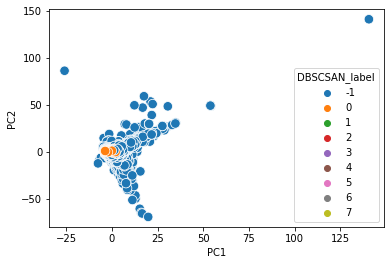

In [153]:
plt.subplot()
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = df1['DBSCSAN_label'], palette = 'tab10')

# display the plot
plt.show()

In [158]:
dbscan_model1 = DBSCAN(eps = 2.5, min_samples = 102)

# fit the model on the scaled data
dbscan_model1.fit(features_scaled)

DBSCAN(eps=2.5, min_samples=102)

In [159]:
(set(dbscan_model.labels_))

{-1, 0}

In [160]:
df1['DBSCSAN_label'] = dbscan_model.labels_

# print head() of the dataframe
df1.head()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
0,19200,0,10,130000.000000,0,16.880000,1.000000,1.000000,15.000000,0.000000,18284.000000,86.200000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,834246.000000,21300.000000,24,0,0,1,6.770833,0.000000,6.000000,1180.370000,3900.000000,0,-1
1,12000,0,1,90000.000000,0,13.280000,0.000000,0.000000,63.000000,0.000000,36129.000000,27.900000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47189.000000,129300.000000,15,0,0,0,7.500000,0.000000,22.000000,49.650000,400.000000,0,-1
2,6500,0,10,77000.000000,0,12.280000,0.000000,0.000000,70.000000,1.000000,6173.000000,50.600000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,236076.000000,12200.000000,11,0,0,1,11.846154,0.000000,27.000000,452.740000,5200.000000,0,0
3,26850,0,10,97800.000000,1,13.600000,0.000000,1.000000,0.000000,0.000000,30334.000000,49.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,176796.000000,61900.000000,41,0,1,0,3.642458,0.000000,12.000000,2685.630000,3500.000000,0,0
4,15000,0,4,67300.000000,0,13.250000,0.000000,0.000000,0.000000,0.000000,21571.000000,85.300000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,187890.000000,25300.000000,14,0,0,1,4.486667,0.000000,22.000000,1355.000000,10000.000000,0,0


In [162]:
df1['DBSCSAN_label'].value_counts()

 0    448788
-1    136701
Name: DBSCSAN_label, dtype: int64

In [163]:
df1[df1.DBSCSAN_label == 0].describe()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
count,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000,448788.000000
mean,13703.133049,0.247598,5.636218,65778.365023,0.666972,17.801430,0.181424,0.588799,14.881516,0.119379,14241.444285,55.009957,0.431959,0.000000,0.000000,0.000000,0.000000,0.000000,55.909405,109660.020948,27399.917513,29.263670,0.197606,0.364344,0.275250,6.106800,0.000000,12.539553,1610.164813,5211.895789,0.448258,0.000000
std,7615.607167,0.431617,3.770422,31052.130567,0.471297,8.089611,0.478146,0.828945,22.127783,0.341786,11010.087703,23.577016,0.495349,0.000000,0.000000,0.000000,0.000000,0.000000,279.558364,104944.286262,18527.564817,12.544790,0.398193,0.481246,0.446641,4.312879,0.000000,7.911521,1691.360225,4776.040197,0.497316,0.000000
min,500.000000,0.000000,0.000000,1896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.561148,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,0.000000,2.000000,44000.000000,0.000000,11.800000,0.000000,0.000000,0.000000,0.000000,6358.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30679.000000,15100.000000,22.000000,0.000000,0.000000,0.000000,3.333333,0.000000,6.000000,481.852500,1293.750000,0.000000,0.000000
50%,12000.000000,0.000000,6.000000,60000.000000,1.000000,17.370000,0.000000,0.000000,0.000000,0.000000,11385.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80669.500000,23700.000000,25.000000,0.000000,0.000000,0.000000,4.767588,0.000000,11.000000,1090.780000,3500.000000,0.000000,0.000000
75%,18325.000000,0.000000,10.000000,80689.200000,1.000000,23.400000,0.000000,1.000000,27.000000,0.000000,19119.000000,73.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,161801.250000,34000.000000,35.000000,0.000000,1.000000,1.000000,7.222222,0.000000,17.000000,2130.000000,8200.000000,1.000000,0.000000
max,35000.000000,1.000000,10.000000,300000.000000,1.000000,54.430000,4.000000,6.000000,130.000000,3.000000,111658.000000,134.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6287.000000,812487.000000,181000.000000,75.000000,1.000000,1.000000,1.000000,50.000000,0.000000,58.000000,19117.510000,21800.000000,1.000000,0.000000


In [164]:
#noise cluster

In [165]:
df1[df1.DBSCSAN_label == -1].describe()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
count,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000,136701.000000
mean,16560.606909,0.346464,5.878055,104454.144761,0.739709,16.910280,0.669849,1.222069,21.244066,0.384737,23833.056400,52.785965,0.423091,1.658710,141.371377,14.903998,0.051682,0.018727,563.156663,208344.874635,41383.207606,35.126217,0.234505,0.308498,0.266977,9.810165,0.201118,18.315426,2393.748641,4360.970476,0.431921,-1.000000
std,10104.064696,0.475845,3.815062,113536.260304,0.438795,8.671495,1.413540,1.425137,24.422413,0.933726,39990.001520,25.935315,0.494051,8.070954,707.934812,108.709330,0.248151,0.151705,3402.508780,214557.172178,57913.148853,14.955390,0.423690,0.461875,0.442382,16.264154,0.400837,11.013767,2917.252515,4357.205506,0.495345,0.000000
min,500.000000,0.000000,0.000000,1200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,8000.000000,0.000000,2.000000,57996.000000,0.000000,10.510000,0.000000,0.000000,0.000000,0.000000,5816.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56887.000000,15500.000000,23.000000,0.000000,0.000000,0.000000,3.714286,0.000000,10.000000,509.020000,900.000000,0.000000,-1.000000
50%,15000.000000,0.000000,6.000000,84000.000000,1.000000,16.260000,0.000000,1.000000,12.000000,0.000000,12504.000000,53.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,131965.000000,23700.000000,33.000000,0.000000,0.000000,0.000000,5.750000,0.000000,17.000000,1338.210000,2600.000000,0.000000,-1.000000
75%,24000.000000,1.000000,10.000000,124000.000000,1.000000,22.750000,1.000000,2.000000,38.000000,0.000000,26949.000000,73.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,309812.000000,47200.000000,44.000000,0.000000,1.000000,1.000000,10.187668,0.000000,25.000000,3080.960000,6500.000000,1.000000,-1.000000
max,35000.000000,1.000000,10.000000,9500000.000000,1.000000,672.520000,30.000000,31.000000,180.000000,86.000000,2560703.000000,892.300000,1.000000,358.680000,33520.270000,7002.190000,16.000000,14.000000,296368.000000,4026405.000000,9999999.000000,75.000000,1.000000,1.000000,1.000000,3236.146939,1.000000,106.000000,24205.620000,30400.000000,1.000000,-1.000000


In [166]:
pca_2 = PCA(n_components = 2, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca_2.fit_transform(features_scaled)

# create a dataframe of the principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])

# head() to display top five rows of the transformed data
df_pca.head()

,PC1,PC2
0,1.526033,1.815729
1,0.192217,1.932519
2,-1.250003,1.054123
3,1.719542,0.433097
4,-0.769910,1.059124


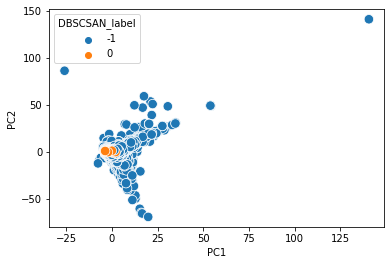

In [167]:
plt.subplot()
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = df1['DBSCSAN_label'], palette = 'tab10')

# display the plot
plt.show()

In [169]:
dbscan_model2 = DBSCAN(eps = 2.0, min_samples = 80)

# fit the model on the scaled data
dbscan_model2.fit(features_scaled)

DBSCAN(eps=2.0, min_samples=80)

In [172]:
(set(dbscan_model2.labels_))

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61}

In [179]:
dbscan_model3 = DBSCAN(eps = 2.5, min_samples = 80)



In [180]:
# fit the model on the scaled data
dbscan_model3.fit(features_scaled)

DBSCAN(eps=2.5, min_samples=80)

In [185]:
(set(dbscan_model3.labels_))

{-1, 0, 1, 2}

In [187]:
df1['DBSCSAN_label'] = dbscan_model3.labels_

# print head() of the dataframe
df1.head()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
0,19200,0,10,130000.000000,0,16.880000,1.000000,1.000000,15.000000,0.000000,18284.000000,86.200000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,834246.000000,21300.000000,24,0,0,1,6.770833,0.000000,6.000000,1180.370000,3900.000000,0,-1
1,12000,0,1,90000.000000,0,13.280000,0.000000,0.000000,63.000000,0.000000,36129.000000,27.900000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47189.000000,129300.000000,15,0,0,0,7.500000,0.000000,22.000000,49.650000,400.000000,0,-1
2,6500,0,10,77000.000000,0,12.280000,0.000000,0.000000,70.000000,1.000000,6173.000000,50.600000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,236076.000000,12200.000000,11,0,0,1,11.846154,0.000000,27.000000,452.740000,5200.000000,0,0
3,26850,0,10,97800.000000,1,13.600000,0.000000,1.000000,0.000000,0.000000,30334.000000,49.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,176796.000000,61900.000000,41,0,1,0,3.642458,0.000000,12.000000,2685.630000,3500.000000,0,0
4,15000,0,4,67300.000000,0,13.250000,0.000000,0.000000,0.000000,0.000000,21571.000000,85.300000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,187890.000000,25300.000000,14,0,0,1,4.486667,0.000000,22.000000,1355.000000,10000.000000,0,0


In [188]:
df1['DBSCSAN_label'].value_counts()

 0    457838
-1    127254
 1       222
 2       175
Name: DBSCSAN_label, dtype: int64

In [189]:
df1[df1.DBSCSAN_label == 0].describe()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
count,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000,457838.000000
mean,13762.980519,0.250477,5.645093,66214.461376,0.668381,17.794538,0.186177,0.597628,15.058536,0.122895,14306.096198,54.982165,0.432087,0.000000,0.000000,0.000000,0.000000,0.000000,56.616648,111016.540972,27531.206420,29.362661,0.198376,0.362740,0.274968,6.135586,0.000000,12.650988,1627.043857,5190.468326,0.449150,0.000000
std,7671.738797,0.433288,3.771676,31475.759840,0.470796,8.097234,0.489890,0.838772,22.239567,0.347784,11123.921154,23.612996,0.495367,0.000000,0.000000,0.000000,0.000000,0.000000,283.168917,106583.707324,18785.295744,12.614469,0.398777,0.480791,0.446499,4.378624,0.000000,7.994622,1727.784800,4767.184233,0.497408,0.000000
min,500.000000,0.000000,0.000000,1896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.561148,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,0.000000,2.000000,44000.000000,0.000000,11.790000,0.000000,0.000000,0.000000,0.000000,6356.000000,37.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30892.000000,15100.000000,22.000000,0.000000,0.000000,0.000000,3.333333,0.000000,7.000000,483.300000,1218.750000,0.000000,0.000000
50%,12000.000000,0.000000,6.000000,60000.000000,1.000000,17.360000,0.000000,0.000000,0.000000,0.000000,11406.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80669.500000,23700.000000,25.000000,0.000000,0.000000,0.000000,4.780000,0.000000,11.000000,1095.580000,3500.000000,0.000000,0.000000
75%,18550.000000,1.000000,10.000000,82000.000000,1.000000,23.390000,0.000000,1.000000,27.000000,0.000000,19205.000000,73.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163809.750000,34100.000000,35.000000,0.000000,1.000000,1.000000,7.250000,0.000000,17.000000,2144.010000,8200.000000,1.000000,0.000000
max,35000.000000,1.000000,10.000000,300000.000000,1.000000,54.430000,4.000000,6.000000,130.000000,3.000000,112415.000000,134.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6287.000000,833695.000000,194000.000000,75.000000,1.000000,1.000000,1.000000,50.000000,0.000000,58.000000,19117.510000,21800.000000,1.000000,0.000000


In [190]:
df1[df1.DBSCSAN_label == 1].describe()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,7527.027027,0.000000,4.274775,41572.416937,0.027027,15.541757,0.045045,0.648649,2.387387,0.009009,10293.747748,67.582432,0.018018,0.019865,392.258468,7.776138,0.000000,0.000000,4.572072,60440.094595,20459.202703,29.554054,0.000000,0.000000,1.000000,6.282226,1.000000,6.112613,882.479369,5974.324324,0.000000,1.000000
std,2874.366220,0.000000,3.091544,16683.162325,0.162529,6.808555,0.207872,0.768717,7.887984,0.094701,6704.022346,19.068071,0.133317,0.295980,262.442483,15.242042,0.000000,0.000000,40.047390,34887.290341,7011.945111,9.721193,0.000000,0.000000,0.000000,3.234616,0.000000,4.326172,549.218738,3487.432932,0.000000,0.000000
min,1000.000000,0.000000,0.000000,12500.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,458.000000,17.500000,0.000000,0.000000,8.850000,0.000000,0.000000,0.000000,0.000000,1758.000000,1300.000000,11.000000,0.000000,0.000000,1.000000,2.057143,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5200.000000,0.000000,2.000000,30000.000000,0.000000,10.217500,0.000000,0.000000,0.000000,0.000000,5369.500000,56.000000,0.000000,0.000000,198.295000,2.252150,0.000000,0.000000,0.000000,23833.500000,17194.500000,23.000000,0.000000,0.000000,1.000000,3.767734,1.000000,3.000000,444.800000,3100.000000,0.000000,1.000000
50%,7725.000000,0.000000,4.000000,39594.500000,0.000000,15.585000,0.000000,0.000000,0.000000,0.000000,8864.500000,70.400000,0.000000,0.000000,367.245000,4.131100,0.000000,0.000000,0.000000,80669.500000,23700.000000,31.000000,0.000000,0.000000,1.000000,5.505051,1.000000,5.500000,804.980000,5200.000000,0.000000,1.000000
75%,9968.750000,0.000000,6.000000,50000.000000,0.000000,20.285000,0.000000,1.000000,0.000000,0.000000,13820.500000,82.250000,0.000000,0.000000,546.335000,5.895950,0.000000,0.000000,0.000000,80669.500000,23700.000000,35.000000,0.000000,0.000000,1.000000,7.956000,1.000000,9.000000,1170.007500,8300.000000,0.000000,1.000000
max,15000.000000,0.000000,10.000000,110000.000000,1.000000,30.270000,1.000000,3.000000,43.000000,1.000000,36558.000000,98.600000,1.000000,4.410000,1042.840000,97.457400,0.000000,0.000000,573.000000,201615.000000,41385.000000,55.000000,0.000000,0.000000,1.000000,17.886179,1.000000,18.000000,3017.230000,14800.000000,0.000000,1.000000


In [191]:
df1[df1.DBSCSAN_label == 2].describe()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,7695.571429,0.000000,4.108571,42469.819771,0.005714,16.216286,0.057143,0.720000,2.051429,0.000000,9269.548571,64.446857,0.005714,0.000000,552.934571,12.998722,0.000000,0.000000,13.651429,52516.871429,18261.148571,33.485714,0.000000,0.982857,0.000000,6.197799,1.000000,5.748571,978.283429,5750.857143,0.000000,2.000000
std,3255.510088,0.000000,2.800797,18345.024031,0.075593,6.180522,0.232781,0.755364,7.098866,0.000000,5928.372903,16.394391,0.075593,0.000000,314.950416,21.797122,0.000000,0.000000,83.160824,33937.090344,7427.517511,8.939038,0.000000,0.130176,0.000000,2.952885,0.000000,4.275658,606.895461,3199.225276,0.000000,0.000000
min,1300.000000,0.000000,0.000000,9600.000000,0.000000,2.510000,0.000000,0.000000,0.000000,0.000000,0.000000,22.400000,0.000000,0.000000,10.240000,0.000000,0.000000,0.000000,0.000000,1792.000000,2800.000000,11.000000,0.000000,0.000000,0.000000,2.045333,1.000000,0.000000,35.870000,400.000000,0.000000,2.000000
25%,5000.000000,0.000000,2.000000,30000.000000,0.000000,11.695000,0.000000,0.000000,0.000000,0.000000,5035.000000,53.350000,0.000000,0.000000,308.240000,3.299350,0.000000,0.000000,0.000000,20105.500000,12750.000000,25.000000,0.000000,1.000000,0.000000,3.814973,1.000000,2.000000,528.685000,3100.000000,0.000000,2.000000
50%,7500.000000,0.000000,4.000000,36000.000000,0.000000,16.670000,0.000000,1.000000,0.000000,0.000000,8150.000000,65.800000,0.000000,0.000000,504.800000,5.923800,0.000000,0.000000,0.000000,61973.000000,20700.000000,33.000000,0.000000,1.000000,0.000000,5.555556,1.000000,5.000000,871.750000,5600.000000,0.000000,2.000000
75%,10000.000000,0.000000,6.000000,52000.000000,0.000000,21.105000,0.000000,1.000000,0.000000,0.000000,11686.000000,76.850000,0.000000,0.000000,802.595000,9.536250,0.000000,0.000000,0.000000,80669.500000,23700.000000,42.000000,0.000000,1.000000,0.000000,7.974600,1.000000,8.000000,1287.215000,7800.000000,0.000000,2.000000
max,18550.000000,0.000000,10.000000,120000.000000,1.000000,29.600000,1.000000,3.000000,40.000000,0.000000,40553.000000,96.200000,1.000000,0.000000,1314.230000,115.482600,0.000000,0.000000,777.000000,165297.000000,41600.000000,55.000000,0.000000,1.000000,0.000000,16.666667,1.000000,20.000000,4001.850000,14300.000000,0.000000,2.000000


In [192]:
df1[df1.DBSCSAN_label == -1].describe()

,loan_amnt,term,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,loan_status,DBSCSAN_label
count,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000,127254.000000
mean,16576.453392,0.344217,5.868554,105830.614854,0.742067,16.875040,0.689416,1.237030,21.118959,0.392145,24326.230115,52.685943,0.423279,1.781814,150.421706,15.978989,0.055519,0.020117,598.416490,210954.900824,41973.611163,35.198972,0.235089,0.309908,0.266491,9.981097,0.212928,18.363839,2393.330373,4372.821090,0.428898,-1.000000
std,10139.855903,0.475114,3.816406,116973.715082,0.437499,8.690725,1.444713,1.443068,24.328194,0.956304,41196.588186,25.989358,0.494081,8.352050,732.308940,112.591925,0.256783,0.157146,3522.175648,218182.000773,59507.509095,14.970927,0.424056,0.462457,0.442125,16.747277,0.409379,11.080551,2921.187989,4371.737501,0.494921,0.000000
min,500.000000,0.000000,0.000000,1200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,8000.000000,0.000000,2.000000,58000.000000,0.000000,10.460000,0.000000,0.000000,0.000000,0.000000,5795.000000,32.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57478.500000,15500.000000,23.000000,0.000000,0.000000,0.000000,3.733333,0.000000,10.000000,505.700000,900.000000,0.000000,-1.000000
50%,15000.000000,0.000000,6.000000,85000.000000,1.000000,16.210000,0.000000,1.000000,12.000000,0.000000,12490.000000,53.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133263.500000,23700.000000,33.000000,0.000000,0.000000,0.000000,5.833333,0.000000,17.000000,1337.305000,2600.000000,0.000000,-1.000000
75%,24000.000000,1.000000,10.000000,125000.000000,1.000000,22.730000,1.000000,2.000000,37.000000,0.000000,27194.000000,73.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,313044.000000,47700.000000,44.000000,0.000000,1.000000,1.000000,10.374341,0.000000,25.000000,3085.072500,6500.000000,1.000000,-1.000000
max,35000.000000,1.000000,10.000000,9500000.000000,1.000000,672.520000,30.000000,31.000000,180.000000,86.000000,2560703.000000,892.300000,1.000000,358.680000,33520.270000,7002.190000,16.000000,14.000000,296368.000000,4026405.000000,9999999.000000,75.000000,1.000000,1.000000,1.000000,3236.146939,1.000000,106.000000,24205.620000,30400.000000,1.000000,-1.000000


In [ ]:
#noise cluster

In [193]:
pca_2 = PCA(n_components = 2, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca_2.fit_transform(features_scaled)

# create a dataframe of the principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])

# head() to display top five rows of the transformed data
df_pca.head()

,PC1,PC2
0,1.526033,1.815729
1,0.192217,1.932519
2,-1.250003,1.054123
3,1.719542,0.433097
4,-0.769910,1.059124


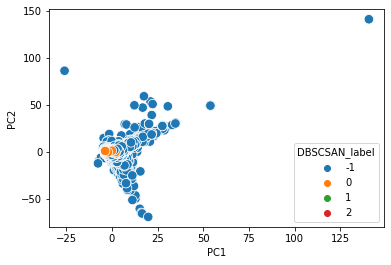

In [194]:
plt.subplot()
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = df1['DBSCSAN_label'], palette = 'tab10')

# display the plot
plt.show()